# Spotify Recomendation System

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 10000)
pd.options.display.float_format = '{:5f}'.format

music_data_path = "music_data/music_data.csv"
data_dictionary_path = "music_data/Spotify_Data_Dictionary.csv"

## Dicionario de dados

In [34]:
data_dictionary = pd.read_csv(data_dictionary_path, encoding='ISO-8859-1')
display(HTML(data_dictionary.to_html(escape=False, max_rows=1000)))

,variable,class,description
0,track_id,character,Song unique ID
1,track_name,character,Song Name
2,track_artist,character,Song Artist
3,track_popularity,double,Song Popularity (0-100) where higher is better
4,track_album_id,character,Album unique ID
5,track_album_name,character,Song album name
6,track_album_release_date,character,Date when album released
7,playlist_name,character,Name of playlist
8,playlist_id,character,Playlist ID
9,playlist_genre,character,Playlist genre


## EDA (Exploratory Data Analysis)

### Analise Geral da Base de Dados

In [37]:
df_original = pd.read_csv(music_data_path)
df_original.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.059400,1921,0.982000,"['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']",0.279000,831667,0.211000,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665000,-20.096000,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve",4,1921,0.036600,80.954000
1,0.963000,1921,0.732000,['Dennis Day'],0.819000,180533,0.341000,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160000,-12.441000,1,Clancy Lowered the Boom,5,1921,0.415000,60.936000
2,0.039400,1921,0.961000,['KHP Kridhamardawa Karaton Ngayogyakarta Hadiningrat'],0.328000,500062,0.166000,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101000,-14.850000,1,Gati Bali,5,1921,0.033900,110.339000
3,0.165000,1921,0.967000,['Frank Parker'],0.275000,210000,0.309000,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381000,-9.316000,1,Danny Boy,3,1921,0.035400,100.109000
4,0.253000,1921,0.957000,['Phil Regan'],0.418000,166693,0.193000,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229000,-10.096000,1,When Irish Eyes Are Smiling,2,1921,0.038000,101.665000


In [38]:
df_original.shape

(170653, 19)

In [39]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [40]:
df_original.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [41]:
unic_values = []
for i in df_original.columns[0:18].tolist():
    print(i, ':', len(df_original[i].astype(str).value_counts()))
    unic_values.append(len(df_original[i].astype(str).value_counts()))

valence : 1733
year : 100
acousticness : 4689
artists : 34088
danceability : 1240
duration_ms : 51755
energy : 2332
explicit : 2
id : 170653
instrumentalness : 5401
key : 12
liveness : 1740
loudness : 25410
mode : 2
name : 133638
popularity : 100
release_date : 11244
speechiness : 1626


### Metricas Estatisticas

In [43]:
df_original.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,230948.310666,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,126118.414668,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,169827.000000,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,207467.000000,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,262400.000000,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5403500.000000,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [44]:
#### Analisando Campos

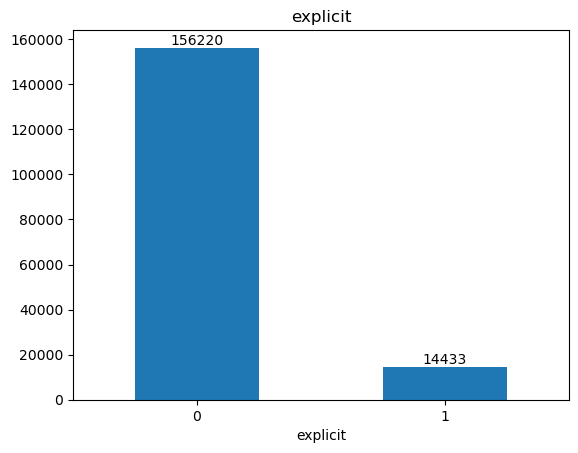

In [45]:
ax = df_original.explicit.value_counts().plot(kind="bar", title = 'explicit', rot=0)

ax.bar_label(ax.containers[0])

plt.show()

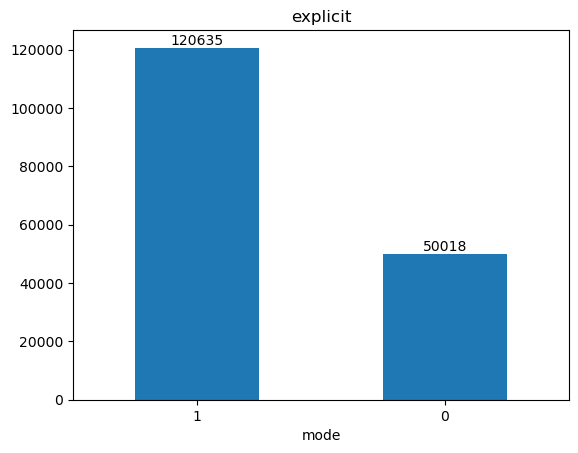

In [46]:
ax = df_original['mode'].value_counts().plot(kind="bar", title = 'explicit', rot=0)

ax.bar_label(ax.containers[0])

plt.show()